In [1]:
import fiona
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from pathlib import Path

In [27]:
#
# Explore the shapefiles
#

# Load the data
project_dir = Path('/Users/merrelbook/Projects/HealthDataVizGA')
data_dir = project_dir / 'DataVisualAnalytics_Industries-cancer' / 'data_raw'
data_path = data_dir / 'US_Shape_Files' / 'cb_2018_us_county_500k.zip'

# Read direct from the .zip file -- See: https://geopandas.org/io.html
gdf = gpd.read_file('zip://'+str(data_path))
gdf = gdf[gdf.STATEFP=='13'].reset_index(drop=True)
gdf.GEOID = gdf.GEOID.apply(int)
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,13,009,00345255,0500000US13009,13009,Baldwin,06,670027544,24802965,"POLYGON ((-83.426739 33.182729, -83.42496 33.1..."
1,13,027,00345518,0500000US13027,13027,Brooks,06,1277108810,12188222,"(POLYGON ((-83.33829 30.639723, -83.337079 30...."
2,13,103,00350219,0500000US13103,13103,Effingham,06,1240066122,10679265,"POLYGON ((-81.548006 32.489286, -81.545503 32...."
3,13,121,01694833,0500000US13121,13121,Fulton,06,1364248547,19674940,"POLYGON ((-84.849311 33.513184, -84.844286 33...."
4,13,141,00348209,0500000US13141,13141,Hancock,06,1220058034,17479744,"POLYGON ((-83.27521999999999 33.191319, -83.27..."


In [28]:
#
# Incidence Rates
#

# Load the data
project_dir = Path('/Users/merrelbook/Projects/HealthDataVizGA')
data_dir = project_dir / 'DataVisualAnalytics_Industries-cancer' / 'data_clean'
data_path = data_dir / 'county_cancer_stats' / 'incidencerates.csv'

df = pd.read_csv(data_path)

df = pd.read_csv(data_path)
df['GEOID'] = df['fips'].apply(int)

df[df.areatype=='county'].head()

,locale,fips,met_health_obj,incidence rate_per_100000,incidence rate_lower_95_confidence,incidence rate_upper_95_confidence,annual_count_avg,recent_trend_str,trend_last_5,trend_last_5_lower_95_confidence,...,cancer,file_name,race,sex,source_url,stage,stateFIPS,type,late_stage_%,GEOID
2,"Pickens County(7,8)",13227.0,***,580.8,547.2,616.1,249.0,rising,1.2,0.2,...,1,incidencerates_000.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN,13227
3,"Towns County(7,8)",13281.0,***,562.7,509.9,620.5,116.0,stable,0.1,-1.1,...,1,incidencerates_000.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN,13281
4,"Union County(7,8)",13291.0,***,546.0,510.5,583.9,226.0,stable,0.4,-0.7,...,1,incidencerates_000.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN,13291
5,"Lee County(7,8)",13177.0,***,542.6,502.8,584.7,154.0,stable,1.2,0.0,...,1,incidencerates_000.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN,13177
6,"Turner County(7,8)",13287.0,***,538.8,475.8,608.2,56.0,stable,0.3,-1.4,...,1,incidencerates_000.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN,13287


In [31]:
joined = pd.merge(gdf, df, on='GEOID')

type(joined)

geopandas.geodataframe.GeoDataFrame

In [36]:
joined

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,areatype,cancer,file_name,race,sex,source_url,stage,stateFIPS,type,late_stage_%
0,13,009,00345255,0500000US13009,13009,Baldwin,06,670027544,24802965,"POLYGON ((-83.426739 33.182729, -83.42496 33.1...",...,county,1,incidencerates_000.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN
1,13,009,00345255,0500000US13009,13009,Baldwin,06,670027544,24802965,"POLYGON ((-83.426739 33.182729, -83.42496 33.1...",...,county,71,incidencerates_001.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN
2,13,009,00345255,0500000US13009,13009,Baldwin,06,670027544,24802965,"POLYGON ((-83.426739 33.182729, -83.42496 33.1...",...,county,76,incidencerates_002.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN
3,13,009,00345255,0500000US13009,13009,Baldwin,06,670027544,24802965,"POLYGON ((-83.426739 33.182729, -83.42496 33.1...",...,county,55,incidencerates_003.csv,0,2,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN
4,13,009,00345255,0500000US13009,13009,Baldwin,06,670027544,24802965,"POLYGON ((-83.426739 33.182729, -83.42496 33.1...",...,county,400,incidencerates_004.csv,0,2,https://www.statecancerprofiles.cancer.gov/inc...,NaN,13,incd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,13,039,01671316,0500000US13039,13039,Camden,06,1632473254,392515252,"POLYGON ((-81.93674899999999 31.060787, -81.93...",...,county,40,incidencerates_054.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,211.0,13,incd,*
8741,13,039,01671316,0500000US13039,13039,Camden,06,1632473254,392515252,"POLYGON ((-81.93674899999999 31.060787, -81.93...",...,county,66,incidencerates_055.csv,0,1,https://www.statecancerprofiles.cancer.gov/inc...,211.0,13,incd,15.6
8742,13,039,01671316,0500000US13039,13039,Camden,06,1632473254,392515252,"POLYGON ((-81.93674899999999 31.060787, -81.93...",...,county,18,incidencerates_056.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,211.0,13,incd,*
8743,13,039,01671316,0500000US13039,13039,Camden,06,1632473254,392515252,"POLYGON ((-81.93674899999999 31.060787, -81.93...",...,county,80,incidencerates_057.csv,0,0,https://www.statecancerprofiles.cancer.gov/inc...,211.0,13,incd,*


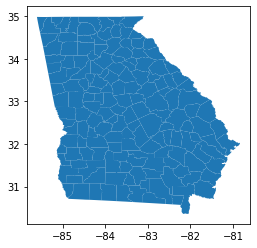

In [34]:
gdf.plot()